## Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import matplotlib.pyplot as plt

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df
from message_ix.tools.add_dac import add_tech
from message_ix.tools.add_dac import get_report
from message_ix.tools.add_dac import get_values

%matplotlib inline



<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


In [2]:
colors = {"LED":"maroon","SSP1":"tab:red","SSP2":"tab:orange","SSP3":"tab:green","SSP4":"tab:blue","SSP5":"tab:purple",}
lines = ["-","-","--","-.",":",(0, (3, 1, 1, 1, 1, 1))]
ssps = ["LED","SSP1","SSP2","SSP3","SSP4","SSP5"]


# Base without DAC

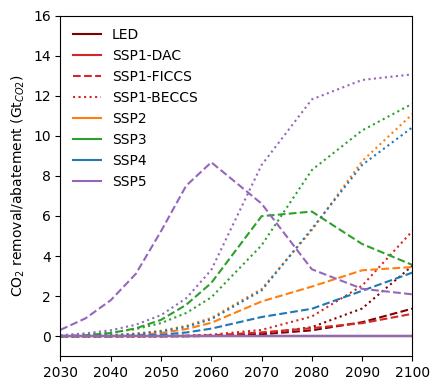

In [3]:

dactec = ['dac_lt','dac_hte','dac_htg']


mp = ixmp.Platform()

plt.figure(figsize=(4.5,4))

dacrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_no-dac": []} 
         for ssp in ssps}

ccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_no-dac": []} 
         for ssp in ssps}

beccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_no-dac": []} 
         for ssp in ssps}


for k,v in dacrem.items():
    for k1,v1 in v.items():
        scen = message_ix.Scenario(mp, model=k, scenario=k1)
        dacremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        dacremoval = dacremoval.groupby("year_act").sum()["lvl"]
        dacrem[k][k1] = dacremoval
        
        ccsremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        ccsremoval = ccsremoval.groupby("year_act").sum()["lvl"]
        ccsrem[k][k1] = ccsremoval
        
        beccsremoval = (scen.var("ACT",{"technology":"co2_trans2","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        beccsremoval = beccsremoval.groupby("year_act").sum()["lvl"]
        beccsrem[k][k1] = beccsremoval


techs_lines = {"DAC":"-","FICCS":"--","BECCS":":"}
for ssp in ssps:
    model = f"SSP_dev_{ssp}_v1.0_materials-dac-co2split"
    scenario = f"1000f_no-dac"
    for tech in techs_lines.keys():
        if tech == "DAC":
            val = dacrem[model][scenario]
        elif tech == "FICCS":
            val = ccsrem[model][scenario]
        else:
            val = beccsrem[model][scenario]
        
        if ssp == "SSP1":
            kwargs = {"label": f"{ssp}-{tech}","ls":techs_lines[tech]}
        elif ssp != "SSP1" and tech == 'DAC':
            kwargs = {"label": f"{ssp}","ls":techs_lines[tech]}
        else:
            kwargs = {"ls":techs_lines[tech]}

        plt.plot(val, c=colors[ssp], **kwargs)
    

plt.xlim(2030,2100)
plt.xticks(range(2030,2110,10))
plt.ylim(-1,16)
plt.yticks(range(0,18,2))
plt.ylabel("CO$_2$ removal/abatement (Gt$_{CO2}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("Base-setup without DAC.jpeg",dpi=300)
plt.show()

mp.close_db()

# All SSP no DAC

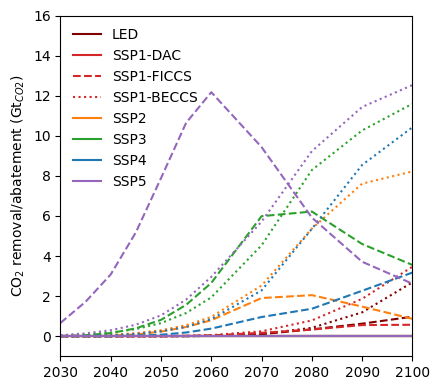

In [4]:
dactec = ['dac_lt','dac_hte','dac_htg']


mp = ixmp.Platform()

plt.figure(figsize=(4.5,4))

dacrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}
          
ccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}

beccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param_no-dac": []} 
         for ssp in ssps}

pipes = ["co2_trans1","co2_trans2","co2_trans3","co2_trans4","co2_trans5","co2_trans6"]

for k,v in dacrem.items():
    for k1,v1 in v.items():
        scen = message_ix.Scenario(mp, model=k, scenario=k1)
        dacremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        dacremoval = dacremoval.groupby("year_act").sum()["lvl"]
        dacrem[k][k1] = dacremoval
        
        ccsremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        ccsremoval = ccsremoval.groupby("year_act").sum()["lvl"]
        ccsrem[k][k1] = ccsremoval
        
        beccsremoval = (scen.var("ACT",{"technology":"co2_trans2","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        beccsremoval = beccsremoval.groupby("year_act").sum()["lvl"]
        beccsrem[k][k1] = beccsremoval


techs_lines = {"DAC":"-","FICCS":"--","BECCS":":"}
for ssp in ssps:
    model = f"SSP_dev_{ssp}_v1.0_materials-dac-co2split"
    scenario = f"1000f_all-ssp-param_no-dac"
    for tech in techs_lines.keys():
        if tech == "DAC":
            val = dacrem[model][scenario]
        elif tech == "FICCS":
            val = ccsrem[model][scenario]
        else:
            val = beccsrem[model][scenario]
        
        if ssp == "SSP1":
            kwargs = {"label": f"{ssp}-{tech}","ls":techs_lines[tech]}
        elif ssp != "SSP1" and tech == 'DAC':
            kwargs = {"label": f"{ssp}","ls":techs_lines[tech]}
        else:
            kwargs = {"ls":techs_lines[tech]}

        plt.plot(val, c=colors[ssp], **kwargs)
    

plt.xlim(2030,2100)
plt.xticks(range(2030,2110,10))
plt.ylim(-1,16)
plt.yticks(range(0,18,2))
plt.ylabel("CO$_2$ removal/abatement (Gt$_{CO2}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("All SSPs without DAC.jpeg",dpi=300)
plt.show()

mp.close_db()

# All SSP with DAC

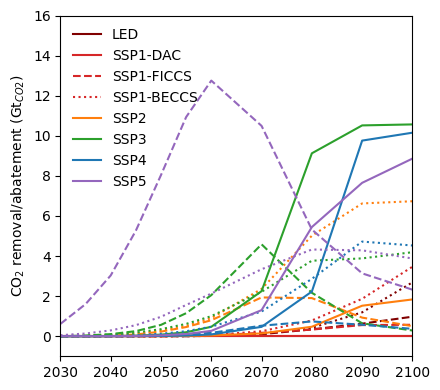

In [5]:
dactec = ['dac_lt','dac_hte','dac_htg']


mp = ixmp.Platform()

plt.figure(figsize=(4.5,4))

dacrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}
          
ccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}

beccsrem = {f"SSP_dev_{ssp}_v1.0_materials-dac-co2split": 
         {f"1000f_all-ssp-param": []} 
         for ssp in ssps}

pipes = ["co2_trans1","co2_trans2","co2_trans3","co2_trans4","co2_trans5","co2_trans6"]

for k,v in dacrem.items():
    for k1,v1 in v.items():
        scen = message_ix.Scenario(mp, model=k, scenario=k1)
        dacremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M2"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        dacremoval = dacremoval.groupby("year_act").sum()["lvl"]
        dacrem[k][k1] = dacremoval
        
        ccsremoval = (scen.var("ACT",{"technology":"co2_trans1","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        ccsremoval = ccsremoval.groupby("year_act").sum()["lvl"]
        ccsrem[k][k1] = ccsremoval
        
        beccsremoval = (scen.var("ACT",{"technology":"co2_trans2","mode":"M1"})
                   .set_index(["node_loc","technology","year_vtg","year_act","mode","time"])
                   .droplevel(["mode","time"])).mul(3.667).div(1000)
        beccsremoval = beccsremoval.groupby("year_act").sum()["lvl"]
        beccsrem[k][k1] = beccsremoval


techs_lines = {"DAC":"-","FICCS":"--","BECCS":":"}
for ssp in ssps:
    model = f"SSP_dev_{ssp}_v1.0_materials-dac-co2split"
    scenario = f"1000f_all-ssp-param"
    for tech in techs_lines.keys():
        if tech == "DAC":
            val = dacrem[model][scenario]
        elif tech == "FICCS":
            val = ccsrem[model][scenario]
        else:
            val = beccsrem[model][scenario]
        
        if ssp == "SSP1":
            kwargs = {"label": f"{ssp}-{tech}","ls":techs_lines[tech]}
        elif ssp != "SSP1" and tech == 'DAC':
            kwargs = {"label": f"{ssp}","ls":techs_lines[tech]}
        else:
            kwargs = {"ls":techs_lines[tech]}

        plt.plot(val, c=colors[ssp], **kwargs)
    

plt.xlim(2030,2100)
plt.xticks(range(2030,2110,10))
plt.ylim(-1,16)
plt.yticks(range(0,18,2))
plt.ylabel("CO$_2$ removal/abatement (Gt$_{CO2}$)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("All SSPs with DAC.jpeg",dpi=300)
plt.show()

mp.close_db()

# Emissions

# Annual CO2 injection

# IAMC Reporting

**Plotting in Pyam**

# Biomass check

# Flow check